# Modules

In [513]:

import string
import pprint # pretty prints (for dicts, ...)
import sys 
import math
import scipy 
import pytest # test driven development
import re # regular expression


import bisect # find position in list (exists in numpy)

import operator # operator.itemgetter() in combi  with sorted & itertools.groupby !!!

import itertools

# collection module
import collections 
from collections import OrderedDict as odict # order dicts (not necessary after Python3.6+)
from collections import Counter
from collections import deque
from collections import defaultdict

# files
from pathlib import Path
import csv
import pickle 
import bz2 # compression -> bz2.open(...)

# plotting
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px

import pandas as pd

import numpy as np


import hashlib

# --------------Introduction--------------

## Data types ------------------------------------

In [1001]:
a = 4 # int
b = 4.3 # float
c = "Love" + " " + "myself" # str
d = [1, 2] # list
e = {"Vorname": "Selina", "Nachname": "Ernst", "Alter": 20} # dict
type(e)

dict

In [13]:
f = set([12,13,14]) # set
g = (1,2,3) # tuple
type(g)

tuple

### String

In [14]:
c[::-2] # string[start:stop:step]
c[:-4] # 'Love my'
c[-2:] # ''lf'

'lf'

string is immutable !!!

In [15]:
# c[0] = "l" funktioniert nicht !!!
c = "l" + c[1:]
c

'love myself'

In [1016]:
c.split()
c.split('v')
c.startswith("L")
c.endswith("f")
c.upper()
c.lower()
len(c)
c.count("m")
c.rstrip("f")
c.lstrip("L")


'ove myself'

string format

In [17]:
# {index:_,position,length,Nachkommastellen}
print("Centered      {0:_^20.4f}".format(42.0030937))    # center text within longer area
print("Aligned left  {0:_<20.4f}".format(42.0030937))    # align left
print("Aligned right {0:_>20.4f}".format(42.0030937))    # align right

Centered      ______42.0031_______
Aligned left  42.0031_____________
Aligned right _____________42.0031


In [18]:
name = "Sheldon"
age = 30

message = "Hello {name}, you are now {age}. Congratulations!".format(name = name, age = age)
message

'Hello Sheldon, you are now 30. Congratulations!'

In [19]:
string_elements = [42.0030937, 2]
"{0:7.4f} and not {1:7.4f}".format(*string_elements) # use an (unpacked) list of elements
string_elements = {'first': 42.00309377849553, 'second': 2}
"{first:7.4f} and not {second:7.4f}".format(**string_elements)  # use a (unpacked) dict

'42.0031 and not  2.0000'

### List

In [1045]:
list1 = [12,13,14] 
list2 = [13,14,15]

list1 +  list2
list1 += list2
list2 += (1,2,3) 
# Error for list2 + (1,2,3) 


In [1051]:
# list1.extend([1,2,3])
list1.append([1,2,3])
list1.pop(len(list1)-1)
list1.insert(0,11)
list1.pop(0)
list1.index(1)
list1.sort()
", ".join([str(i) for i in list1])

'1, 2, 3, 12, 13, 13, 14, 14, 15'

enumerate! -> Position and value of list element

In [23]:
for pos, element in enumerate(list1):
    print(str(pos) + " , " + str(element))
print(list(enumerate(list1)))

0 , 12
1 , 13
2 , 14
3 , 13
4 , 14
5 , 15
[(0, 12), (1, 13), (2, 14), (3, 13), (4, 14), (5, 15)]


### Set

In [24]:
set(list1) - set(list2)

{12}

### Dictionary

In [25]:
e.keys()
e.values()
for key, value in e.items():
    print(str(key) + " : " + str(value))

Vorname : Selina
Nachname : Ernst
Alter : 20


In [26]:
e["Wohnort"] = "Heidelberg"
e.update({"geburtsort": "Erfurt"})
# change name of key
e["Geburtsort"] = e.pop('geburtsort')
e

{'Vorname': 'Selina',
 'Nachname': 'Ernst',
 'Alter': 20,
 'Wohnort': 'Heidelberg',
 'Geburtsort': 'Erfurt'}

In [27]:
sorted(e) # sorting keys
e.get("Friends", "None") # doesnt care if not there

'None'

In [28]:
dict3 = [
    {
    "name" : "Frodo",
    "letters": 5,
    "grade": "nice guy"
    },
    {
    "name" : "Aragon",
    "letters": 6,
    "grade": "cool guy"
    },

]
sorted(dict3, key = operator.itemgetter("grade"))

[{'name': 'Aragon', 'letters': 6, 'grade': 'cool guy'},
 {'name': 'Frodo', 'letters': 5, 'grade': 'nice guy'}]

## Python comparisons -------------------------

In [29]:
2 == 1 # False
2 != 1 # True
2 >= 1 # True
2 <= 1 # False

False

There is a difference between 'is' and '=='

In [30]:
s1 = "Nature is great"
s2 = "Nature is great"
s1 == s2 # True
s1 is s2 # False

False

In [31]:
True is not True # False
True is True # True
True == True # True

True

In [32]:
int1 = 12
int2 = 12
int1 is int2 # True
int1 == int2 # True

True

thinking that objectes eval to the same ensures equality is one major source of errors

In [33]:
def release_password(authentication=False):
    answer = "Not authenticated"
    if authentication:
        answer = "Here is your password"
    return answer

# same as:

def release_password(authentication=False):
    answer = "Not authenticated"
    if bool(authentication):
        answer = "Here is your password"
    return answer

In [34]:
release_password(authentication=True) # 'Here is your password'

release_password(authentication=[]) # 'Not authenticated'

release_password(authentication=[1]) # 'Here is your password'

'Here is your password'

In [35]:
def release_password(authentication=False):
    answer = "Not authenticated"
    if authentication == True:
        answer = "Here is your password"
    return answer

In [36]:
release_password(authentication=True) # 'Here is your password'

release_password(authentication=[]) # 'Not authenticated'

release_password(authentication=[1]) # 'Not authenticated'

'Not authenticated'

Evaluating Objects

In [37]:
[] is True # False
[1] is True # False

[] == True # False
[1] == True # False

bool([]) == True # False
bool([1]) == True # True


True

## Operators ------------------------------------

In [38]:
2 * 3
2 ** 3 # pow(2,3)
7/3
7//3
7%3

1

In [39]:
i = 0
i += 1
i -= 1
i

0

### in

In [40]:
'dog' in 'Not sure I went out with the dOg' # False
'dog' in 'Not sure I went out with the dog' # True
'dog' in ('d0g', 'dOg', 'dog', 'dot') # True
1 in [2,5,3,1,6] # True
"Vorname" in e.keys() # True


True

### and , or

In [41]:
(1 == 2) or (1 < 2) # True
(1 == 2) and (1 < 2) # False

False

In [42]:
(1 == 2) | (1 < 2) # True
(1 == 2) & (1 < 2) # False

False

## Object references ----------------------------

In [43]:
def print_id(variable, vname = "variable value"):
    # vnames = [name for name in globals() if globals()[name] is variable]
    print("{name:>20} = {value:<15}  id: {id:>13}".format(name = vname, value = str(variable), id = id(variable)))


In [44]:
print_id(a, "a")
print_id(a)
print_id(b, "b")
print_id(c, "c")
print_id(d, "d")
print_id(e, "e")

                   a = 4                id: 1570457282960
      variable value = 4                id: 1570457282960
                   b = 4.3              id: 1570808065648
                   c = love myself      id: 1570809552816
                   d = [1, 2]           id: 1570809502656
                   e = {'Vorname': 'Selina', 'Nachname': 'Ernst', 'Alter': 20, 'Wohnort': 'Heidelberg', 'Geburtsort': 'Erfurt'}  id: 1570539039104


## Lists and Generators -------------------------

### range

In [45]:
for i in range(0,10,1): print(i, abs(i - 10)) # or range(10,0,-1)

0 10
1 9
2 8
3 7
4 6
5 5
6 4
7 3
8 2
9 1


### list/dict generators

In [46]:
s = list(string.ascii_letters[0:11])
dict2 = {"number": list(range(0,11)), "letter": s}
{"first value of " + key : values[0] for key, values in dict2.items()}

{'first value of number': 0, 'first value of letter': 'a'}

In [1059]:
[x + 10 for x in d]
[[x * y for x in range(0,6)] for y in range(1,6)]
[[x, y] for x in range(0,3) for y in range(0,3)]
[[x, y] for x in range(0,3) for y in range(0,3) if x != y]

[[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1]]

## Loops -----------------------------------------

In [48]:
for e in list1:
    if e%2 == 0: print(e)
    else: pass # or continue

print("-------")

for e in list1:
    if e%2 == 0: print(e)
    else: break

12
14
14
-------
12


In [49]:
abc = ['A', 'B', 'C']

[v_x + v_y for pos_x, v_x in enumerate(abc) for pos_y, v_y in enumerate(abc)]
# [vx+vy for posx, vx in enumerate(abc) for posy, vy in enumerate(abc) if posy > posx]

['AA', 'AB', 'AC', 'BA', 'BB', 'BC', 'CA', 'CB', 'CC']

In [50]:
already_seen = set()
for e1 in abc:
    for e2 in abc:
        if e1 == e2:
            continue
        
        sorted_tuple = tuple(sorted([e1, e2]))
        
        if sorted_tuple in already_seen:
            continue
        
        print(e1, e2)
        already_seen.add(sorted_tuple)
print("------------")
already_seen = []
for e1 in abc:
    for e2 in abc:
        if e1 == e2:
            continue
        
        sorted_tuple = tuple(sorted([e1, e2]))
        
        if sorted_tuple in already_seen:
            continue
        
        print(e1, e2)
        already_seen += [sorted_tuple]

A B
A C
B C
------------
A B
A C
B C


# --------- Modules - Examples ---------


## Bisect module -------------------------------

In [51]:
list3 = [1,3,6,12,14,16]

In [52]:
# Return the index where to insert item x in list a, assuming a is sorted.
bisect.bisect(list3, 4) # 2
bisect.bisect_right(list3, 3) # 2
bisect.bisect_left(list3, 3) # 1
# Insert item x in list a, and keep it sorted assuming a is sorted.
bisect.insort(list3, 4)
list3

[1, 3, 4, 6, 12, 14, 16]

In [53]:
# also works with more complex lists, as log the elements are comparable
a = [(1, "First"), (3, "Third"), (6, "too late")]
# for strings: lexicographic (R < T)
new_element = (3, "Really add some more stuff")
bisect.bisect(a, new_element) 

1

## itertools --------------------------------------

In [54]:
# basically all veriations (n^k)
itertools1 = list(itertools.product(abc, repeat = 2))

print(itertools1)
len(itertools1) == 3**2

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')]


True

In [55]:
# choose k from n 
import scipy.special
itertools2 = list(itertools.combinations(abc, 2))

print(itertools2)
len(itertools2) == scipy.special.comb(3,2)

[('A', 'B'), ('A', 'C'), ('B', 'C')]


True

In [56]:
list(itertools.chain(abc,range(0,10),abc))

['A', 'B', 'C', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'A', 'B', 'C']

In [57]:
for name, grp in (itertools.groupby(dict3, key = operator.itemgetter("grade"))):
    print(name)
    for e in grp: 
        print(e)



nice guy
{'name': 'Frodo', 'letters': 5, 'grade': 'nice guy'}
cool guy
{'name': 'Aragon', 'letters': 6, 'grade': 'cool guy'}


## collections ------------------------------------

### collections.Counter

In [58]:
s = """
MQRLMMLLATSGACLGLLAVAAVAAAGANPAQRDTHSLLPTHRRQKRDWIWNQMHIDEEK
NTSLPHHVGKIKSSVSRKNAKYLLKGEYVGKVFRVDAETGDVFAIERLDRENISEYHLTA
VIVDKDTGENLETPSSFTIKVHDVNDNWPVFTHRLFNASVPESSAVGTSVISVTAVDADD
PTVGDHASVMYQILKGKEYFAIDNSGRIITITKSLDREKQARYEIVVEARDAQGLRGDSG
TATVLVTLQDINDNFPFFTQTKYTFVVPEDTRVGTSVGSLFVEDPDEPQNRMTKYSILRG
DYQDAFTIETNPAHNEGIIKPMKPLDYEYIQQYSFIVEATDPTIDL RYMSPPAGNRAQVI
"""

In [59]:
Counter("AAAB") + Counter("BBBA") # Counter({'A': 4, 'B': 4})
Counter([1,1,2,2,4,4]) # Counter({1: 2, 2: 2, 4: 2})
Counter([(1,1),(1,1)]) # Counter({(1, 1): 2})

Counter({(1, 1): 2})

### collections.deque

In [60]:
s = """MQRLMMLLATSGACLGLLAVAAVAAAGANPAQRDTHSLLPTHRRQKRDWIWNQMHIDEEKNTSLPHHVGKIKSSVSRKNAKYLLKGEYVGKVFRVDAETGDVFAIERLDRENISEYHLTA"""
window = deque([], maxlen=5)
for pos, aa in enumerate(s):
    window.append(aa)
    print(window)
    if pos >= 5:
        break
Counter(window)

deque(['M'], maxlen=5)
deque(['M', 'Q'], maxlen=5)
deque(['M', 'Q', 'R'], maxlen=5)
deque(['M', 'Q', 'R', 'L'], maxlen=5)
deque(['M', 'Q', 'R', 'L', 'M'], maxlen=5)
deque(['Q', 'R', 'L', 'M', 'M'], maxlen=5)


Counter({'Q': 1, 'R': 1, 'L': 1, 'M': 2})

### collections.defaultdicts

In [61]:
ddict_int = defaultdict(int)
ddict_list = defaultdict(list)

ddict_int[10] += 10
print(dict(ddict_int))

{10: 10}


In [62]:
def default_factory_with_prefilled_dictionary():
    return {"__name": "our custom dict", "errors": 0}
    
ddict_custom = defaultdict(default_factory_with_prefilled_dictionary)
ddict_custom[1]["errors"] += 10
ddict_custom

defaultdict(<function __main__.default_factory_with_prefilled_dictionary()>,
            {1: {'__name': 'our custom dict', 'errors': 10}})

## pathlib.Path ----------------------------------

In [63]:
path_wd = Path.cwd()
print(path_wd)
print("-------")
file_name = Path("playground.ipynb")
file_name = file_name.resolve()

print("{0} {1}".format("file_name", file_name))
print("{0:<20} {1}".format("file_name.parent", file_name.parent))
print("{0:<20} {1}".format("file_name.stem", file_name.stem))
print("{0:<20} {1}".format("file_name.suffix", file_name.suffix))
print("{0:<20} {1}".format("file_name.name", file_name.name))
print("-------")
file_name.parent.parent / "notebooks" 

c:\Users\Selina Ernst\Documents\GitHub\advanced_python_2021-22_HD\learning
-------
file_name C:\Users\Selina Ernst\Documents\GitHub\advanced_python_2021-22_HD\learning\playground.ipynb
file_name.parent     C:\Users\Selina Ernst\Documents\GitHub\advanced_python_2021-22_HD\learning
file_name.stem       playground
file_name.suffix     .ipynb
file_name.name       playground.ipynb
-------


WindowsPath('C:/Users/Selina Ernst/Documents/GitHub/advanced_python_2021-22_HD/notebooks')

In [64]:
# create new paths

# new_file.resolve(Path("new.txt")) # funktioniert nicht, da nicht gefunden
root = Path(".") 
print(root.resolve() == Path.cwd()) # True
new_file = root / ".." /"new.txt" 
print(new_file.resolve()) # new path
print(new_file.exists()) # False
with open(new_file, "w") as f:
    print("New File!", file=f)
print(new_file.exists()) # True

True
C:\Users\Selina Ernst\Documents\GitHub\advanced_python_2021-22_HD\new.txt
False
True


delete files

In [65]:
new_file.unlink(missing_ok = True)

In [66]:
# iterating directionary
for file in Path.cwd().iterdir():
    print(file.name)
    
for file in Path.cwd().parent.glob(".*"):
    print(file.name)


file.txt
filter.ipynb
lena.png
play.py
playground.ipynb
.git
.github
.gitignore
.pytest_cache
.venv
.vscode


## csv module -----------------------------------

How to create a file normally

In [67]:
# write a file 
### 'x' -> create new, 'r' -> read, 'w' -> write
myfile="testfile.txt"
f = open(myfile, "x")
f.write("This is a test")
f.close()


use csv module

In [68]:
# read a simple .txt file with csv.reader
with open(myfile) as f:
    f_reader = csv.reader(f)
    for line in f_reader:
        print(line)
        break
# read a dictionary file with csv.reader
with open("../data/amino_acid_properties.csv", "r") as f:
    f_reader = csv.DictReader(f)
    aa_list = list(f_reader)

['This is a test']


In [69]:
with open(myfile, "w", newline = '\n') as f:
    f_writer = csv.DictWriter(f, fieldnames=["Name", "1-letter code", "3-letter code", "pk-state"], extrasaction='ignore')
    f_writer.writeheader()
    for line in aa_list:
        f_writer.writerow(line)

In [70]:
# delte the file
import os
## If file exists, delete it ##
if os.path.isfile(myfile):
    os.remove(myfile)

# --------------- functions ---------------

## How to write functions ------------------------

In [71]:
# docstring make it easier to understand
def f(args):
    """[summary]

    Args:
        args ([type]): [description]

    Returns:
        [type]: [description]
    """
    return 0


**Never** set default kwargs in functions to mutable objects as they are initialized once, exist until program is stopped and will behave strangly.

In [72]:
input_list = []
# when using global variables: 
def extend_list_with_three_none():
    """Extend input_list with 3 * None
    
    """
    global input_list
    input_list += [None, None, None]
    return input_list

In [73]:
extend_list_with_three_none() 

[None, None, None]

In [74]:
def extend_list_with_three_none(input_l = None):
    """Extend input_list with 3 * None
    
    """
    if input_l is None: input_l = []
    input_l += [None, None, None]
    return input_l

In [75]:
extend_list_with_three_none()

[None, None, None]

### global variables

better not use them! 
Advantages:
* variable can be overwritten in functions without changing code else where unexpectedly
* code becomes very readble

In [76]:
counter = 0
def increase_counter():
    """Ugly!"""
    global counter
    counter += 10
    return

In [77]:
increase_counter()
counter

10

## Recursive Functions ---------------------------

In [78]:
# fibonacci
def fib(n):
    if n in (0,1):
        return n
    else:
        return fib(n-2) + fib(n-1)

[fib(i) for i in range(0,10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

# ---------------- Plotting ----------------

## plotly express ----------------------------------

In [79]:
file_path = Path.cwd().parent/"data"/ "amino_acid_properties.csv"
aa_df = pd.read_csv(file_path) # pandas data frame

In [80]:
# violin plot
fig_violin = px.violin(
    data_frame = aa_df,
    x = "pk-state",
    y = "Accessible surface",
    box = True,
    points = "all", 
    hover_name = "1-letter code",
)

# scatterplot? 
fig_strip = px.strip(aa_df, x="Residue Weight", y="hp_type")
fig_strip = px.strip(aa_df, x="Residue Weight", y="hp_type", facet_col="pk-state")


# fig_violin.show()
# fig_strip.show()

In [81]:
df = pd.read_csv('../data/cities.csv')
fig_map = px.density_mapbox(
    df, 
    lat='lat', 
    lon='lng', 
    z='population', 
    radius=10,
    center=dict(lat=0, lon=180), 
    zoom=0,
    mapbox_style="stamen-terrain"
)
df.continent.fillna("", inplace=True)
fig_box = px.box(
    df, 
    x="continent", 
    y="population",
    log_y=True,
    hover_data=df.columns,
)
fig_map.show()
# fig_box.show()

## plotly graph_objects ---------------------------

In [82]:
# templates for plotly layouts
plotly.io.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [83]:
data_Bar = [go.Bar(
    x = aa_df["1-letter code"],
    y = aa_df["hydropathy index (Kyte-Doolittle method)"],
    marker_color = aa_df.hp_color,
    text = "Name: " + aa_df['Name'] + "<br />" +            # "<br />" is HTML
        "Weight: " + aa_df['Residue Weight'].astype(str) + "<br />" +
        "Formula:" + aa_df['Residue Formula']

)]

data_Pie = [go.Pie(
    labels = aa_df["1-letter code"],
    values = aa_df["Accessible surface"],
    hole = 0.3
)]

data_Scatter = [go.Scatter(
    x = aa_df["1-letter code"],
    y = aa_df["hydropathy index (Kyte-Doolittle method)"],
    mode = "lines+markers",
    marker = {
        "size": aa_df["Accessible surface"],
        "color": aa_df["hp_color"],
    }
)]

# fig = go.Figure(data = data_Bar, layout = {"template": "plotly", "title": "Hydropathy"})
# fig = go.Figure(data = data_Pie, layout = {"template": "plotly", "title": "Accessible surface"})
fig = go.Figure(data = data_Scatter, layout = {"template": "plotly", "title": "Hydropathy"})

fig.update_layout(template = "seaborn", xaxis_title = "x", yaxis_title = "y")
fig.show()

In [84]:
data = [
    go.Bar(
        x=aa_df["1-letter code"],
        y=aa_df.pka1,
        hovertext=aa_df["Name"],
        name="pka1"
    ),
    go.Bar(
        x=aa_df["1-letter code"],
        y=aa_df.pka2,
        hovertext=aa_df["Name"],
        name="pka2"
    ),
    go.Bar(
        x=aa_df["1-letter code"],
        y=aa_df.pkaX,
        hovertext=aa_df["Name"],
        name="pkaX"
    ),
    go.Bar(
        x=aa_df["1-letter code"],
        y=aa_df.pI,
        hovertext=aa_df["Name"],
        name="pI"
    )

]
go.Figure(data)

# ------------------ OOP -----------------

## class ------------------------------------------

In [85]:
class Sequence(object):

    total_initialized_sequence = 0
    all_intialized_sequences = []

    # initializing 
    def __init__(self, sequence = None):
        # attributes:

        self.sequence = sequence
        self._length = None
        self._aa_distribution = None
        self._id = None

        Sequence.total_initialized_sequence += 1 # increases every time an object is initialized
        Sequence.all_intialized_sequences.append(self)

        self._current_iter_state = 0

    @property
    def length(self):
        if self._length is None:
            self._length = len(self.sequence)
        return self._length

    @property
    def id(self):
        if self._id is None:
            self._id = id(self)
        return self._id

    @property
    def aa_distribution(self):
        if self._aa_distribution is None:
            self._aa_distribution = Counter(self.sequence)
        return self._aa_distribution

    @classmethod
    def class_status(cls):
        print(f"There have been {Sequence.total_initialized_sequence} sequences intialized.")

    @classmethod
    def class_objects(cls):
        print(Sequence.all_intialized_sequences)

    # magic methods:
    def __str__(self):          # print?
        message = f"Sequence class mobi-HD __________\n"
        message += f"length {self.length}, id {self.id}\n"
        message += f"aminoacid sequence: '{' '.join(self.sequence)}'\n"
        message += f"_________________________________"
        return message

    def __iter__(self):
        self._current_iter_state = 0
        return self
    
    def __next__(self):             # iterable object?
        if self._current_iter_state < self.length:
            current_aa = self.sequence[self._current_iter_state]
            self._current_iter_state += 1
            return current_aa
        else: 
            raise StopIteration

    
    def __add__(self, other):
        return Sequence(self.sequence + other.sequence)
    
    def __eq__(self, other):
        return self.sequence == other.sequence
    
    def __lt__(self, other):                    # neccessary for sorting of objects
        return self.length < other.length # ! using .length instead od _length ! because call od property method
    
    def __gt__(self, other):
        return self.length > other.length


    # methods

    def add(self, other):
        return self + other # use of magic method

    def print_sequence(self):
        print(" ".join(self.sequence))



In [86]:
s1 = Sequence("ELVISLIVES")
s2 = Sequence("ANDIAMHAPPY")
s1.sequence
# s1.total_initialized_sequence == Sequence.total_initialized_sequence 
# Sequence.class_status()
# Sequence.class_objects()
print(s1)
print(s1.length)
print(s2.sequence)
s2.print_sequence()
(s1 + s2).print_sequence()

for s in sorted([s1, s2]): s.print_sequence()
[i for i in s1] # iterable object!cla

Sequence class mobi-HD __________
length 10, id 1570866971360
aminoacid sequence: 'E L V I S L I V E S'
_________________________________
10
ANDIAMHAPPY
A N D I A M H A P P Y
E L V I S L I V E S A N D I A M H A P P Y
E L V I S L I V E S
A N D I A M H A P P Y


['E', 'L', 'V', 'I', 'S', 'L', 'I', 'V', 'E', 'S']

## inheritance -----------------------------------

In [87]:
class Vehicles:
    def __init__(self, tank = 0, distance = 0, speed = 0):
        self.tank = tank
        self.distance = distance
        self.speed = speed

    def tanken(self, liter = 0, vehicle = "vehicle"):
        self.tank += liter
        message = "{0:_^40}\n".format("Refuelling of " + vehicle)
        message += f"The {vehicle} was refueled with {liter} L.\n"
        message += f"current  tank level: {self.tank:>10.3f} L"
        print(message)

    def status(self, vehicle = "vehicle"):
        Warn = ""
        if self.tank == 0: Warn += f"FILL UP THE TANK!\n"
        message = "{0:_^40}\n".format("STATUS of " + vehicle)   
        message += Warn     
        message += f"current kilometrage: {self.distance:>10.3f} km\n"
        message += f"current  tank level: {self.tank:>10.3f} L"
        print(message)

    def fahren(self, distance = 0, umsatz = 10, vehicle = "vehicle"):
        end_tank  = self.tank - (distance / umsatz)
        if (end_tank >= 0):
            self.distance += distance
            driven_distance = distance
            self.tank = end_tank
        else:
            self.distance += self.tank * umsatz
            driven_distance = self.tank * umsatz
            self.tank = 0      
        message = "{0:_^40}\n".format("Driving of " + vehicle)
        message += f"The {vehicle} drove {driven_distance} km.\n"
        message += f"current kilometrage: {self.distance:>10.3f} km\n"
        message += f"current tank level:  {self.tank:>10.3f} L"
        print(message)  

class Car(Vehicles):
    def __init__(self, tank = 0, distance = 0, speed = 0):
        super().__init__(tank, distance, speed)
        self.tyres = 4
    
    def status(self, type="car"):
        super().status(type)
    
    def tanken(self, liter=0, vehicle="car"):
        super().tanken(liter, vehicle)

    def fahren(self, distance = 0, umsatz = 12.5, vehicle = "car"):
        super().fahren(distance, umsatz, vehicle)

class Motorcylce(Vehicles):
    def __init__(self, tank = 0, distance = 0, speed = 0):
        super().__init__(tank, distance, speed)
        self.tyres = 2

    def status(self, type="motorcylcle"):
        super().status(type)
    
    def tanken(self, liter=0, vehicle="motorcylcle"):
        super().tanken(liter, vehicle)
    
    def fahren(self, distance = 0, umsatz = 4.4, vehicle = "motorcylcle"):
        super().fahren(distance, umsatz, vehicle)


In [88]:
car = Car()
m = Motorcylce()
print(isinstance(car, Vehicles))

car.status()
car.tanken(10)
car.fahren(120)

m.status()
m.tanken(100)
m.fahren(5)

True
_____________STATUS of car______________
FILL UP THE TANK!
current kilometrage:      0.000 km
current  tank level:      0.000 L
___________Refuelling of car____________
The car was refueled with 10 L.
current  tank level:     10.000 L
_____________Driving of car_____________
The car drove 120 km.
current kilometrage:    120.000 km
current tank level:       0.400 L
_________STATUS of motorcylcle__________
FILL UP THE TANK!
current kilometrage:      0.000 km
current  tank level:      0.000 L
_______Refuelling of motorcylcle________
The motorcylcle was refueled with 100 L.
current  tank level:    100.000 L
_________Driving of motorcylcle_________
The motorcylcle drove 5 km.
current kilometrage:      5.000 km
current tank level:      98.864 L


# ------- Test Driven Development ------

In [89]:
# need folder for function to test on

fundir_path = Path.cwd().parent / "test_function"
fundir_path.mkdir(exist_ok = True)

# need folder for tests 

testdir_path = Path.cwd().parent / "tests"
testdir_path.mkdir(exist_ok = True)


In [90]:
# test function folder needs: 
#       __init__.py
#       function.py

# __init__ py is required in a folder 
# to be recognized as a python module
# otherwise the import statements won't work

message = "from . import function\n"
message += "from . import peaks"
fundir_path / "__init__.py"
with open(fundir_path / "__init__.py", "w") as f:
    f.write(message)



In [91]:
%%writefile ../test_function/function.py 

def magic(input):
    return type(input)


Overwriting ../test_function/function.py


In [98]:
%%writefile ../test_function/peaks.py 

def find_max(input_list):
    if (type(input_list) != list):
        return []
    else:
        return max(input_list)

Overwriting ../test_function/peaks.py


In [95]:
%%writefile ../tests/test_whatever.py
import sys
from pathlib import Path

sys.path.append( str(Path(__file__).parent.parent.resolve()) )

import test_function

def test_int():
    t = test_function.function.magic(0)
    assert t == int

def test_list():
    t = test_function.function.magic([1,2,4])
    assert t == list


def test_max():
    m = test_function.peaks.find_max([2,4,5,1,3])
    assert m == 5

Overwriting ../tests/test_whatever.py


# ----------- Pandas (module) -----------

## pd.Series -------------------------------------

In [271]:
# INITIALISATION
number_series1 = pd.Series(
    data = [i for i in range(10,16)],
    index = [ "r" + str(i) for i in range(1,7)]
)
number_series2 = pd.Series(
    data = [10 for i in range(13,16)],
    index = [ "r" + str(i) for i in range(4,7)]
)

# NaN values as np.nan
missing_v_series = pd.Series(
    data = [i/2 if i%2 == 0 else np.nan for i in range(10,16) ],
    index = [str(i) for i in range(1,7)]
)


missing_v_series


1    5.0
2    NaN
3    6.0
4    NaN
5    7.0
6    NaN
dtype: float64

In [317]:
# ATTRIBUTES
number_series1.array
number_series1.dtypes #dtype('int64')
number_series1.index
number_series1.values
number_series1.shape #(6,)
number_series1.size #6

number_series1.index.name = "variable"
number_series1.name = "counts"
print(number_series1)

# np SERIES methods 
missing_v_series.isna() 
missing_v_series.notnull()
missing_v_series.abs()

missing_v_series.reset_index() # creates data frame!

missing_v_series = missing_v_series.add_prefix("r")

variable
r1    10
r2    11
r3    12
r4    13
r5    14
r6    15
Name: counts, dtype: int64


In [273]:
# INDEXING
print(number_series1[0], number_series1["r1"])
print((10*number_series1)[0])

# INDEX vs. VALUES
print(
"r1" in number_series1, #TRUE
"r1" in number_series1.index, #TRUE
10 in number_series1, #FALSE !!
10 in number_series1.values #TRUE
)

# ADDING series
print(number_series1 + number_series2)

# RENAMING index
number_series2.index = ["r"+ str(i) for i in range(1,4)]
print(number_series1 + number_series2)



10 10
100
True True False True
r1     NaN
r2     NaN
r3     NaN
r4    23.0
r5    24.0
r6    25.0
dtype: float64
r1    20.0
r2    21.0
r3    22.0
r4     NaN
r5     NaN
r6     NaN
dtype: float64


## Masks ----------------------------------------

In [276]:
mask1 = number_series1 > 12
mask2 = number_series1 < 15
print(number_series1[mask1 & mask2])
print(number_series1[~mask1 & mask2])

variable
r4    13
r5    14
Name: counts, dtype: int64
variable
r1    10
r2    11
r3    12
Name: counts, dtype: int64


## pd.DataFrame -------------------------------

In [290]:
df_numbers = pd.DataFrame(
    data = [number_series1, missing_v_series] # each element of list = row
)
df_numbers

,r1,r2,r3,r4,r5,r6
counts,10.0,11.0,12.0,13.0,14.0,15.0
Unnamed 0,5.0,NaN,6.0,NaN,7.0,NaN


In [333]:
# ATTRIBUTES
df_numbers.iloc[0]
df_numbers.loc["counts"]
df_numbers.loc["counts","r1"]



df_numbers_T = df_numbers.T

df_numbers_T.iloc[0]
df_numbers_T.loc["r1"]
df_numbers_T.loc["r1", "counts"]

df_numbers_T.columns = ["counts", "div2"]
df_numbers_T.columns.name = "Parametes"
df_numbers_T.index.name = "Variables"

df_numbers_T.values     # creates numpy array shape (6, 2)


rec.array([('r1', 10.,  5.), ('r2', 11., nan), ('r3', 12.,  6.),
           ('r4', 13., nan), ('r5', 14.,  7.), ('r6', 15., nan)],
          dtype=[('Variables', 'O'), ('counts', '<f8'), ('div2', '<f8')])

In [334]:
# METHODS
df_numbers_T.to_records()

rec.array([('r1', 10.,  5.), ('r2', 11., nan), ('r3', 12.,  6.),
           ('r4', 13., nan), ('r5', 14.,  7.), ('r6', 15., nan)],
          dtype=[('Variables', 'O'), ('counts', '<f8'), ('div2', '<f8')])

## Exercise panda ------------------------------

In [846]:
col1 = np.append(np.arange(12,15) , 121)
col2 = np.arange(10,41,10)

df_exercise1 = pd.DataFrame(
    data = [col1, col2],
    columns = [i for i in range(0,4)],
    index = ["count1", "count2"]
).T
df_exercise1

,count1,count2
0,12,10
1,13,20
2,14,30
3,121,40


In [847]:
aa_dict = {}

for pos, aa in enumerate(aa_list):
    aa_dict[aa_list[pos]["1-letter code"]] = aa_list[pos]

df_exercise2 = pd.DataFrame.from_dict(aa_dict, orient='index')

df_exercise2 = df_exercise2.drop(columns = ["Accessible surface", "pI", "hydropathy index (Kyte-Doolittle method)", "hp_color", "hp_type", "pka1", "pka2", "pkaX"])
df_exercise2.head(2)

,Name,3-letter code,1-letter code,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pk-state
A,Alanine,Ala,A,89.1,C3H7NO2,C3H5NO,71.08,neutral
R,Arginine,Arg,R,174.2,C6H14N4O2,C6H12N4O,156.19,alkine


In [848]:
df_exercise2 = df_exercise2.append({"Name": " some random amino acid"}, ignore_index=True)
df_exercise2 = df_exercise2.drop(df_exercise2.shape[0]-1)
df_exercise2 = df_exercise2.astype({"Molecular Weight" : float, "Residue Weight" : float})
df_exercise2.sort_values(["Molecular Weight"], ascending = True)
# df_exercise2.info()
df_exercise2.describe()
df_exercise2.head(2)

,Name,3-letter code,1-letter code,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pk-state
0,Alanine,Ala,A,89.1,C3H7NO2,C3H5NO,71.08,neutral
1,Arginine,Arg,R,174.2,C6H14N4O2,C6H12N4O,156.19,alkine


In [990]:
# regular expression (re)
mask = df_exercise2["Residue Formula"].str.match(pat = r'^C([6-9]|1[1-9])H(1[1-9])')
df_exercise2["Residue Formula"].str.split(pat = "(H[0-9]+)")[0]


['C3', 'H5', 'NO']

In [993]:
df_exercise2.iloc[0]
df_exercise2.loc[0, "Name"]
df_exercise2.drop(0).iloc[0]
df_exercise2.drop(0).loc[1] # 0 doesnt exist
df_exercise2[0:3] # what doesnt work is: df_exercise2[0] 
df_exercise2["Residue Weight"][0:3]
df_exercise2.iloc[0:3,1]

0    Ala
1    Arg
2    Asn
Name: 3-letter code, dtype: object

In [856]:
t = 130
df_exercise2.query("'Residue Weight' < 'Molecular Weight'")

KeyError: 'False: boolean label can not be used without a boolean index'

# ----------- Numpy (module) -----------

In [ ]:
np.array([1,2,3]) # 1 dimensions
np.array([[1,2,3], [4,5,6]]) # 2 dimensions
np.array([[[1,2,3], [4,5,6]], [[1,2,3], [4,5,6]]]) # 3 dimensions

np_array = np.array(
    [
        np.arange(1,6,1),
        np.arange(6,11,1),
        np.arange(11,16,1),
        np.arange(16,21,1),
        np.arange(21,26,1),
        np.arange(26,31,1),
        np.arange(31,36,1),
        np.arange(36,41,1)
    ]
)

In [ ]:
np_array[0] == np_array[0, :]
np_array[0,0]
np_array[0,0:3]
np_array[:,:]

True

In [ ]:
# CLASS methods

number_array = np.arange(6, 0, -1) # like range(6,0,-1)
np.zeros([2,2])
np.ones([2,2], dtype = np.int64)
np.empty([2,2])

np.reshape(np.ones(6), newshape = (2,3))

# LOGICAL operators between arrays!!!
logical_array1 = np.array([False, True, False, True])
logical_array2 = np.array([False, False, True, True])

np.logical_and(logical_array1, logical_array2)
np.logical_or(logical_array1, logical_array2)
np.logical_not(logical_array2)

# use of logical operators
number_array[ np.logical_or( number_array >= 5 , number_array < 2)]
number_array[(number_array >= 5) | (number_array < 2)]

# np.sort(number_array)



array([6, 5, 1])

In [ ]:
number_array.sort() # changes array

np_array.shape #(8, 5)
np_array.ndim #2
np_array.size # 8*5 = 40


# np_array[::-1,::-1]
# np_array




40

# ----- Regular Expression (module) ----

In [967]:
txt = "DAS IST EIN Beispiel-Text um meine skills 10000x besser testen zu können. Zahlen wie 900 und 29 sollten zu finden sein"

df_re = pd.DataFrame(
    data = [[],[]],
    index = ["pattern", "index start", "search", "findall", "split"]
).T


patterns  = []
patterns.append(r"\s")
patterns.append(r"(\b[a-zA-Z|0-9|ä|ö|ü]+\b)") # find all words
patterns.append(r"(0*)") # zero or more occurrences
patterns.append(r"(0+)") # one or more occurences
patterns.append(r"(ei|ie)") # either or
patterns.append(r"(\d+)") # either or

for pat in patterns:
    result_search = re.search(pat, txt)     # returns Match object (Methods: start(), group(), ...)
    result_index_start = result_search.start() # returns index of first occurrence
    result_findall = re.findall(pat, txt)     # returns list
    # result_match = re.match(pat, txt)        # checks only start of string, when no match than None
    result_split = re.split(pat, txt)

    
    df_re = df_re.append({
        "pattern": pat, 
        "index start" : result_index_start,
        "search" : str(result_search),
        "search": ", ".join([str(i) for i in result_search.groups()]),
        "findall": ", ".join([str(r) for r in result_findall]),
        "split" : ", ".join(result_split)
        }, ignore_index=True)
   
df_re

,pattern,index start,search,findall,split
0,\s,3.0,,", , , , , , , , , , , , , , , ...","DAS, IST, EIN, Beispiel-Text, um, meine, skill..."
1,(\b[a-zA-Z|0-9|ä|ö|ü]+\b),0.0,DAS,"DAS, IST, EIN, Beispiel, Text, um, meine, skil...",", DAS, , IST, , EIN, , Beispiel, -, Text, ..."
2,(0*),0.0,,", , , , , , , , , , , , , , , , , , , , , , , ...",", , D, , A, , S, , , , I, , S, , T, , , , E,..."
3,(0+),43.0,0000,"0000, 00","DAS IST EIN Beispiel-Text um meine skills 1, 0..."
4,(ei|ie),13.0,ei,"ei, ie, ei, ie, ei","DAS IST EIN B, ei, sp, ie, l-Text um m, ei, ne..."
5,(\d+),42.0,10000,"10000, 900, 29","DAS IST EIN Beispiel-Text um meine skills , 10..."


In [970]:
txt = "AGACGCGCGCGGAGAGA"


df_re = pd.DataFrame(
    data = [[],[]],
    index = ["pattern", "index start", "search", "findall", "split"]
).T


patterns  = []
patterns.append(r"((GA)+)")
patterns.append(r".(.(GA)+)")

for pat in patterns:
    result_search = re.search(pat, txt)     # returns Match object (Methods: start(), group(), ...)
    result_index_start = result_search.start() # returns index of first occurrence
    result_findall = re.findall(pat, txt)     # returns list
    result_split = re.split(pat, txt)

    print(result_search)

    print(len(result_search.groups()))
    df_re = df_re.append({
        "pattern": pat, 
        "index start" : result_index_start,
        "search": ", ".join([str(i) for i in result_search.groups()]) ,
        "findall": ", ".join([str(r) for r in result_findall]),
        "split" : ", ".join(result_split)
        }, ignore_index=True)
   
df_re

<re.Match object; span=(1, 3), match='GA'>
2
<re.Match object; span=(9, 17), match='CGGAGAGA'>
2


,pattern,index start,search,findall,split
0,((GA)+),1.0,"GA, GA","('GA', 'GA'), ('GAGAGA', 'GA')","A, GA, GA, CGCGCGCG, GAGAGA, GA,"
1,.(.(GA)+),9.0,"GGAGAGA, GA","('GGAGAGA', 'GA')","AGACGCGCG, GGAGAGA, GA,"


In [981]:
lc = [[j * offset for j in range(1,3)] for offset in range(0,3)]
type(lc)

list

# Exercise

In [985]:
x = 2
g = lambda x: x + 1

def f(x): return x + 1
print(g(x),f(x))

3 3


In [ ]:
averageGrade = np.array([72,56,88,23])
chemistryGrade = np.array([66,43,55,51])

np.logical_and(averageGrade > 50 , chemistryGrade < 50)

array([False,  True, False, False])

In [ ]:
array = np.array([
    [[1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1]],
    [[2,2,2,2,2,2], [2,2,2,2,2,2], [2,2,2,2,2,2], [2,2,2,2,2,2], [2,2,2,2,2,2]], 
    [[1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1]]
    ])


In [ ]:
array.shape


(3, 5, 6)

In [ ]:
array2 = np.mean(array, axis = 2)

In [ ]:
array2.shape

(3, 5)

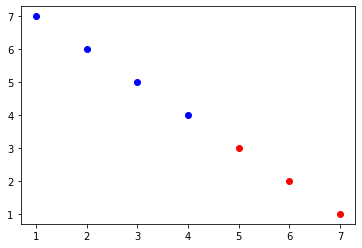

In [ ]:
g = np.array([1,2,3,4,5,6,7])
h = np.array([7,6,5,4,3,2,1])
t = 4
col_red  = g>t
col_blue = g<=t

plt.scatter(g[col_red], h[col_red], c = 'red')
plt.scatter(g[col_blue], h[col_blue], c = 'blue')



In [ ]:
aminoacid_sequence = "MSLTIWTVCGVLSLFGALSYA"
fasta = ''
fasta += '>seq1\n'
seq_per_line = ''
index_counter = 0
for AA in aminoacid_sequence:
    index_counter += 1
    if index_counter <= 7:
        seq_per_line += AA
    else:
        fasta += seq_per_line 
        fasta += '\n'
        seq_per_line = ''
        index_counter = 0
fasta += seq_per_line
print(fasta)


>seq1
MSLTIWT
CGVLSLF
ALSYA


In [ ]:
aminoacid_sequence = input("aminoacid sequence: ")
output_file_name = input("output file name:") 

In [ ]:
output_file = open(output_file_name, "x")
output_file.write(aminoacid_sequence)
output_file.close() 

In [ ]:
def ggT2(x,y):
    if y == 0:
        return x
    else:
        return ggT2(y,x%y)

In [ ]:
[x for x in range(10,2,-2)]

[10, 8, 6, 4]

In [ ]:
for a,b in enumerate(["a","b"]):
    print(a,b)

0 a
1 b


In [ ]:
from collections import deque
import pandas as pd
import plotly.graph_objs as go
from pathlib import Path

aa_df = pd.read_csv("C:/Users/Selina Ernst/Documents/GitHub/advanced_python_2021-22_HD/data/amino_acid_properties.csv")
# aa_df = pd.read_csv("C:\Users\Selina Ernst\Documents\GitHub/advanced_python_2021-22_HD\data\amino_acid_properties.csv")

# aa_df = pd.read_csv("../data/amino_acid_properties.csv")

aa_df = aa_df.set_index("1-letter code", drop = False)
aa_df

,Name,3-letter code,1-letter code,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pka1,pka2,pkaX,pI,hydropathy index (Kyte-Doolittle method),Accessible surface,hp_type,hp_color,pk-state
1-letter code,,,,,,,,,,,,,,,,
A,Alanine,Ala,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,NaN,6.00,1.8,44.1,neutral,green,neutral
R,Arginine,Arg,R,174.20,C6H14N4O2,C6H12N4O,156.19,2.17,9.04,12.48,10.76,-4.5,159.2,hydrophilic,blue,alkine
N,Asparagine,Asn,N,132.12,C4H8N2O3,C4H6N2O2,114.11,2.02,8.80,NaN,5.41,-3.5,80.8,hydrophilic,blue,neutral
D,Aspartic acid,Asp,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,2.77,-3.5,76.3,hydrophilic,blue,acidic
C,Cysteine,Cys,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,5.07,2.5,56.4,hydrophobic,grey,alkine
E,Glutamic acid,Glu,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,3.22,-3.5,99.2,hydrophilic,blue,acidic
Q,Glutamine,Gln,Q,146.15,C5H10N2O3,C5H8N2O2,128.13,2.17,9.13,NaN,5.65,-3.5,100.6,hydrophilic,blue,neutral
G,Glycine,Gly,G,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,NaN,5.97,-0.4,0.0,neutral,green,neutral
H,Histidine,His,H,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,7.59,-3.2,98.2,hydrophilic,blue,neutral


In [ ]:
dna_seq = "AACCCCAACC"
pattern_1 = "C+"
pattern_2 = "C*"
match_result_1 = re.search(pattern_1, dna_seq)
match_result_2 = re.search(pattern_2, dna_seq)
print(match_result_1.group(), sep = "\n")

CCCC
